<a href="https://colab.research.google.com/github/malikkotb/Seminar_SS23/blob/main/Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with a Convolutional Neural Network

This step-by-step guide through building a Convolutional Neural Network for Image Classification assumes you have already successfully managed to install PyTorch on your computer and were able to create a new Jupyter Notebook to start coding.

The following code is mainly from these sources:
*   https://medium.com/thecyphy/train-cnn-model-with-pytorch-21dafb918f48
* https://learn.microsoft.com/en-us/windows/ai/windows-ml/tutorials/pytorch-data
* https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
* https://medium.com/bitgrit-data-science-publication/building-an-image-classification-model-with-pytorch-from-scratch-f10452073212
* https://pytorch.org/vision/stable/index.html

## Imports

These are imports that we will be needing and using throughout the process of building our entire network.

In [13]:
# The below imports can be found on https://pytorch.org/docs/
import torch
import torch.nn as nn # for defining a neural network
import torch.nn.functional as F # for importing activation functions like ReLu
from torch.utils.data import DataLoader # for
from torchvision import datasets, transforms, models # for performing transformations on the images
from torchvision.utils import make_grid # to view a batch of images
import os # https://docs.python.org/3/library/os.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# So we can ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

## Preprocessing starts here

## Load the dataset

In this section we will load in the dataset. In this project I have chosen the "Animal Faces" dataset from https://www.kaggle.com/datasets/andrewmvd/animal-faces?resource=download

You can go ahead and **download the dataset from the provided url**.

After downloading the dataset you should upload zipped images folder from your system into Google Colab.
Steps:
1. Download dataset from kaggle. You will receive a zipped file called: "archive.zip".
2. Unzip this file.
2. Upload the unzipped folder: "afhq" to Google Drive.
4. Use the following commands to mount google drive.
5. Then extract files to the local environment with the `!unzip` command

Source: https://www.aboutdatablog.com/post/how-to-successfully-add-large-data-sets-to-google-drive-and-use-them-in-google-colab

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Here we unzip the files:

In [6]:
!unzip gdrive/MyDrive/Seminar\ Data/archive.zip

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: afhq/train/wild/flickr_wild_001378.jpg  
  inflating: afhq/train/wild/flickr_wild_001379.jpg  
  inflating: afhq/train/wild/flickr_wild_001380.jpg  
  inflating: afhq/train/wild/flickr_wild_001381.jpg  
  inflating: afhq/train/wild/flickr_wild_001382.jpg  
  inflating: afhq/train/wild/flickr_wild_001384.jpg  
  inflating: afhq/train/wild/flickr_wild_001385.jpg  
  inflating: afhq/train/wild/flickr_wild_001386.jpg  
  inflating: afhq/train/wild/flickr_wild_001387.jpg  
  inflating: afhq/train/wild/flickr_wild_001388.jpg  
  inflating: afhq/train/wild/flickr_wild_001389.jpg  
  inflating: afhq/train/wild/flickr_wild_001390.jpg  
  inflating: afhq/train/wild/flickr_wild_001391.jpg  
  inflating: afhq/train/wild/flickr_wild_001392.jpg  
  inflating: afhq/train/wild/flickr_wild_001393.jpg  
  inflating: afhq/train/wild/flickr_wild_001394.jpg  
  inflating: afhq/train/wild/flickr_wild_001395.jpg  
  inflating: af

#### Structure of our files
The image files are stored in a main folder called "afhq" and inside that folder there will be two more folders: "train" and "val" for training and validation (aka testing). Each of these folders are subdivided into 3 further folders for the 3 different classes that we have in this dataset: "cat", "dog", and "wild". The "wild" folder contain the images with the wildlife animals.


## Explore the dataset


View an image from our dataset.

In [7]:
from PIL import Image
from IPython.display import display

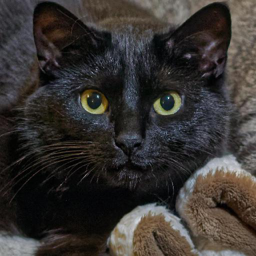

In [26]:
# All images have a prefix of "flickr" or "pixabay", then the corresponding
# class name (cat, dog, wild) and a number, .. .jpg
with Image.open('/content/afhq/train/cat/flickr_cat_000032.jpg') as im:
  resized_image = im.resize((256,256))  # Resize the image
  display(resized_image)


In [32]:
import random

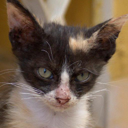

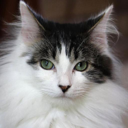

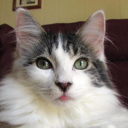

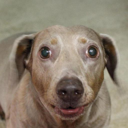

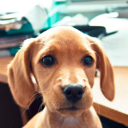

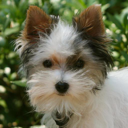

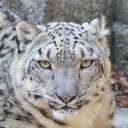

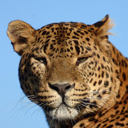

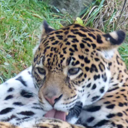

In [38]:
from PIL import Image
from IPython.display import display

# Define the prefix, class names, and the range of numbers for the images
prefixes = ["flickr", "pixabay"]
class_names = ["cat", "dog", "wild"]
num_images_per_class = 3
image_size = (128, 128)  # size for displayed images

random.seed(42)
random_number = random.randint(1, 500)

# Iterate over the class names
for class_name in class_names:
    # Iterate over the prefixes
    # for prefix in prefixes:
        # Iterate over the range of numbers for the images
        # the images start with the number/index: 2 -> so the first image in train/cat is: 000002
        for number in range(random_number, num_images_per_class + random_number):
            image_path = f"/content/afhq/train/{class_name}/{prefixes[0]}_{class_name}_{number:06d}.jpg"
            try:
                with Image.open(image_path) as im:
                    resized_image = im.resize(image_size)  # Resize the image
                    display(resized_image)
            except FileNotFoundError:
                print(f"File not found: {image_path}")
                continue




Luckily the images in this dataset are all the same size (512x512).
Furthermore, as we can see from the randomly displayed images above, all of the images are already cropped to round about the center of the head of each individual animal. Making a further transformation of the images such as center-cropping not necessary.

#### Data Augmentation

In [12]:
# TODO: put this in the paper not the notebook


Data augmentation for image classification refers to the technique of applying various transformations to existing data samples to create additional training examples. The goal is to increase the diversity and variability of the training data, which can help improve the performance and generalisation of machine learning models. Here are some examples of data augmentation techniques commonly used in computer vision tasks:

* Geometric transformations: randomly flip, crop, rotate, stretch, and zoom images. You need to be careful about applying multiple transformations on the same images, as this can reduce model performance.
* Color space transformations: randomly change RGB color channels, contrast, and brightness.
* Kernel filters: randomly change the sharpness or blurring of the image.
* Random erasing: delete some part of the initial image.
Mixing images: blending and mixing multiple images

Sources:
* https://en.wikipedia.org/wiki/Data_augmentation
* https://www.datacamp.com/tutorial/complete-guide-data-augmentation

## Define our transforms

In this section we will perform image preprocessing and image transformations to make our images suitable for training.

Data Augmentation: quick explanation (source angeben)

Transformations (rotation, flipping etc.) are used for data augmentation.

In [19]:
# TODO: in paper:
# sources, unter anderem: https://www.geeksforgeeks.org/how-to-normalize-images-in-pytorch/
# explain each transformation
# why do we resize
# why do we flip, rotate (for data augmentation)
# If we centerCrop, why do we do that
# why do we transform totensor() ?
# why do we normalise

# why do we not add Rotation and flipping transformations to test set.

When an image is transformed into a PyTorch tensor, the pixel values are scaled between 0.0 and 1.0. In PyTorch, this transformation can be done using torchvision.transforms.ToTensor().

The <a href='https://discuss.pytorch.org/t/normalization-in-the-mnist-example/457/22'>recommended normalization parameters</a> for mean and std per channel.

Source:
* https://www.geeksforgeeks.org/how-to-normalize-images-in-pytorch/

In [39]:
# TODO: remove the transformation:
# transforms.Resize(128) (which is a quarter of the size of the original images) for train_transform AND test_transform
# and add transforms.Resize(256) # half the image size, and see how the model performs
# and remove the transform completely
# -> to see how the model performs on the images with their original sizes
# this will of course slow down training iterations

# and perhaps use 224 as dimensions (these dimensions are often used in CIFAR-10 dataset)

In [ ]:
# Compose() to perform a variety of transformations
train_transform = transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(128),             # resize to 128x128
        # resizing to a smaller dimension can speed up training iterations
        transforms.ToTensor(), # ToTensor()
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

# For the test set, I don't want to randomly rotate and randomly
# flip these images, since we're really just using those transforms
# to test out the capability of the network to predict on a
# new real image of a dog or a cat.
# And the real images in the dataset, those aren't randomly rotated/flipped.

test_transform = transforms.Compose([
        transforms.Resize(128),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

## Preparing our train and test sets

Here we will load and split our data into training and test set and prepare the Batches using the DataLoader objects.

The DataLoader makes it easy to load and group data into the individual batches from a dataset.

We will also use the built-in torchvision dataset tool called ImageFolder to load our images.

Source:
* https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html
* https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [ ]:
root = '../../My-Tutorial-Notebooks/Data/CATS_DOGS/'
​
train_data = datasets.ImageFolder(os.path.join(root, 'train'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root, 'test'), transform=test_transform)
​
torch.manual_seed(23)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)
​
class_names = train_data.classes
​


In [ ]:
print(class_names)
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

Those aren't that many images for training/testing. But we need to keep in mind, that we have this list of transformations (Data Augmentation) we can perform on this data.

So essentially, as we're feeding in these randomly transformed batches, we're not only just showing the same available images every time; we're showing kind of randomized rotations or flippings of them.

## Display a single batch of images

We will display a batch of images, to make sure (to verify) that the training laoder selects "wild", "cat", and "dog" images at random.

 So we want it to be trained on cats, dogs, and wildlife simultaneaously so we can not learn all cats first and then all dogs and then all wildlife animals. Otherwise, it won't lead to a generalized model and would perform poorly.

So we need to make sure that it's feeding in both cats, dogs and wildlife animals kind of randomly at the same time, and that we are performing those random transformations, such as flipping horizontally or rotation.

10 images, 3 color channels where each channel is 224by224 (because of the transformations we did above in *resizing*

In [ ]:
# Grab the first batch of 10 images
for images,labels in train_loader:
    break

# Print the labels
print('Label:', labels.numpy())
print('Class:', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=6)  # the default nrow is 8

# We normalized the images in the transformations, so
# we will inverse the normalisation

# Inverse normalize the images
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)

# Print the images
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));
# np.transpose(..) -> we have to transpose the axes in order to
# get the color channel to the correct dimension that matplotlib expects


As you can see here some of the images are randomly rotated and some may be horizontally flipped.

We actually can't see the horizontal flippings as we haven't seen all the original images in the dataset.

## Preprocessing done

## Define our Convoluional Neural Network model

##  Define a Loss function and optimizer


## Train the model on the training data.

## Save the trained model

## Evaluate the performance of the model